# 1 . Importing libraries and loading data

In [1]:
# importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [2]:
# Load data into pandas dataframes
dim_cities = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\dim_cities.csv')
dim_date = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\dim_date.csv')
dim_plan = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\dim_plan.csv')
fact_atliqo_metrics = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\fact_atliqo_metrics.csv')
fact_market_share = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\fact_market_share.csv')
fact_plan_revenue = pd.read_csv(r'C:\Users\HP\Desktop\C3 Input_for_Participants\fact_plan_revenue.csv')


# Step 2: Understand the Data
Explore the first few rows of each dataframe to understand the structure of the data.

In [3]:
print(dim_cities.head())

   city_code  city_name
0     400001     Mumbai
1     110001      Delhi
2     700001    Kolkata
3     560001  Bangalore
4     600001    Chennai


In [4]:
print(dim_date.head())

        date month_name before/after_5g  time_period
0  01-Jan-22        Jan       Before 5G            1
1  01-Feb-22        Feb       Before 5G            2
2  01-Mar-22        Mar       Before 5G            3
3  01-Apr-22        Apr       Before 5G            4
4  01-Jun-22        Jun        After 5G            1


In [5]:
print(dim_plan.head())

  plan                                   plan_description
0   p1  Smart Recharge Pack (2 GB / Day Combo For 3 mo...
1   p2  Super Saviour Pack (1.5 GB / Day Combo For 56 ...
2   p3        Elite saver Pack (1 GB/ Day) Valid: 28 Days
3   p4  Mini Data Saver Pack (500 MB/ Day) Valid: 20 Days
4   p5                    Rs. 99 Full Talktime Combo Pack


In [6]:
print(fact_atliqo_metrics.head())

        date  city_code company  atliqo_revenue_crores  arpu  \
0  01-Jan-22     400001  Atliqo                  60.69   192   
1  01-Jan-22     110001  Atliqo                  42.71   175   
2  01-Jan-22     700001  Atliqo                  36.91   175   
3  01-Jan-22     560001  Atliqo                  37.40   175   
4  01-Jan-22     600001  Atliqo                  30.80   203   

   active_users_lakhs  unsubscribed_users_lakhs  
0               31.61                      1.90  
1               24.41                      1.31  
2               21.09                      1.25  
3               21.37                      1.39  
4               15.17                      1.12  


In [7]:
print(fact_market_share.head())

        date  city_code  tmv_city_crores company  ms_pct
0  01-Jan-22     400001           286.29  Atliqo   21.20
1  01-Jan-22     110001           241.59  Atliqo   17.68
2  01-Jan-22     700001           222.19  Atliqo   16.61
3  01-Jan-22     560001           195.41  Atliqo   19.14
4  01-Jan-22     600001           166.78  Atliqo   18.47


In [8]:
print(fact_plan_revenue.head())

        date  city_code plans  plan_revenue_crores
0  01-Jan-22     400001    p1                 6.26
1  01-Jan-22     110001    p1                 4.58
2  01-Jan-22     700001    p1                 4.29
3  01-Jan-22     560001    p1                 4.26
4  01-Jan-22     600001    p1                 3.60


# Step 3: Data Cleaning
Check for missing values and handle them if necessary.

In [9]:
# Check for missing values
print(dim_cities.isnull().sum())

city_code    0
city_name    0
dtype: int64


In [10]:
print(dim_date.isnull().sum())

date               0
month_name         0
before/after_5g    0
time_period        0
dtype: int64


In [11]:
print(dim_plan.isnull().sum())

plan                0
plan_description    0
dtype: int64


In [12]:
print(fact_atliqo_metrics.isnull().sum())

date                        0
city_code                   0
company                     0
atliqo_revenue_crores       0
arpu                        0
active_users_lakhs          0
unsubscribed_users_lakhs    0
dtype: int64


In [13]:
print(fact_market_share.isnull().sum())

date               0
city_code          0
tmv_city_crores    0
company            0
ms_pct             0
dtype: int64


In [14]:
print(fact_plan_revenue.isnull().sum())

date                   0
city_code              0
plans                  0
plan_revenue_crores    0
dtype: int64


In [15]:
# Handle missing values if needed
# Example: filling missing values with mean
# ['arpu'].fillna(fact_atliqo_metrics['arpu'].mean(), inplace=True)

# 1. Total Revenue:

In [16]:
total_revenue = fact_atliqo_metrics['atliqo_revenue_crores'].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 3187.36


# 2. Average Revenue (Avg Revenue Per User):

In [17]:
avg_revenue = fact_atliqo_metrics['arpu'].mean()
print("Average Revenue:", avg_revenue)

Average Revenue: 200.74166666666667


# 3. Total Active Users:

In [18]:
total_active_users = fact_atliqo_metrics['active_users_lakhs'].sum()
print("Total Active Users:", total_active_users)

Total Active Users: 1617.23


# 4. Total Unsubscribed Users:

In [19]:
total_unsubscribed_users = fact_atliqo_metrics['unsubscribed_users_lakhs'].sum()
print("Total Unsubscribed Users:", total_unsubscribed_users)

Total Unsubscribed Users: 125.9


# 5. Monthly Active Users:

In [20]:
monthly_active_users = fact_atliqo_metrics['active_users_lakhs'].mean()
print("Monthly Active Users:", monthly_active_users)

Monthly Active Users: 13.476916666666666


# 6. Market Share Percentage (MS %):

In [21]:
average_market_share = fact_market_share['ms_pct'].mean()
print("Market Share %:", average_market_share)

Market Share %: 20.000049999999998


# 7. Total Revenue Before 5G:

# 8. Total Revenue After 5G:

In [22]:
# Merge fact_atliqo_metrics with dim_date on the 'date' column
merged_data = pd.merge(fact_atliqo_metrics, dim_date, on='date')

# Filter data for 'Before 5G' period
revenue_before_5g = merged_data[merged_data['before/after_5g'] == 'Before 5G']['atliqo_revenue_crores'].sum()

# Filter data for 'After 5G' period
revenue_after_5g = merged_data[merged_data['before/after_5g'] == 'After 5G']['atliqo_revenue_crores'].sum()

print("Total Revenue Before 5G:", revenue_before_5g)
print("Total Revenue After 5G:", revenue_after_5g)


Total Revenue Before 5G: 1597.7
Total Revenue After 5G: 1589.6599999999999


# 9: ARPU Before 5G

# 10: ARPU After 5G

In [23]:
# Merge fact_atliqo_metrics with dim_date on the 'date' column
merged_data = pd.merge(fact_atliqo_metrics, dim_date, on='date')

# Calculate ARPU Before 5G
arpu_before_5g = merged_data[merged_data['before/after_5g'] == 'Before 5G']['arpu'].mean()

print("ARPU Before 5G:", arpu_before_5g)

# Calculate ARPU After 5G
arpu_after_5g = merged_data[merged_data['before/after_5g'] == 'After 5G']['arpu'].mean()

print("ARPU After 5G:", arpu_after_5g)


ARPU Before 5G: 190.23333333333332
ARPU After 5G: 211.25


# 11. Total Active Users Before 5G:


# 12. Total Active Users After 5G:


In [24]:
# Merge fact_atliqo_metrics with dim_date on the 'date' column
merged_data = pd.merge(fact_atliqo_metrics, dim_date, on='date')

# Calculate Total Active Users Before 5G
active_users_before_5g = merged_data[merged_data['before/after_5g'] == 'Before 5G']['active_users_lakhs'].sum()

print("Total Active Users Before 5G:", active_users_before_5g)

# Calculate Total Active Users After 5G
active_users_after_5g = merged_data[merged_data['before/after_5g'] == 'After 5G']['active_users_lakhs'].sum()

print("Total Active Users After 5G:", active_users_after_5g)


Total Active Users Before 5G: 843.5299999999997
Total Active Users After 5G: 773.7


# 13: Total Unsubscribed Users Before 5G

# 14: Total Unsubscribed Users After 5G


In [25]:
# Merge fact_atliqo_metrics with dim_date on the 'date' column
merged_data = pd.merge(fact_atliqo_metrics, dim_date, on='date')

# Calculate Total Unsubscribed Users Before 5G
unsubscribed_users_before_5g = merged_data[merged_data['before/after_5g'] == 'Before 5G']['unsubscribed_users_lakhs'].sum()

print("Total Unsubscribed Users Before 5G:", unsubscribed_users_before_5g)


# Calculate Total Unsubscribed Users After 5G
unsubscribed_users_after_5g = merged_data[merged_data['before/after_5g'] == 'After 5G']['unsubscribed_users_lakhs'].sum()

print("Total Unsubscribed Users After 5G:", unsubscribed_users_after_5g)


Total Unsubscribed Users Before 5G: 56.330000000000005
Total Unsubscribed Users After 5G: 69.57


# Step 4: Data Exploration and Visualization
Exploring Active Users Over Time

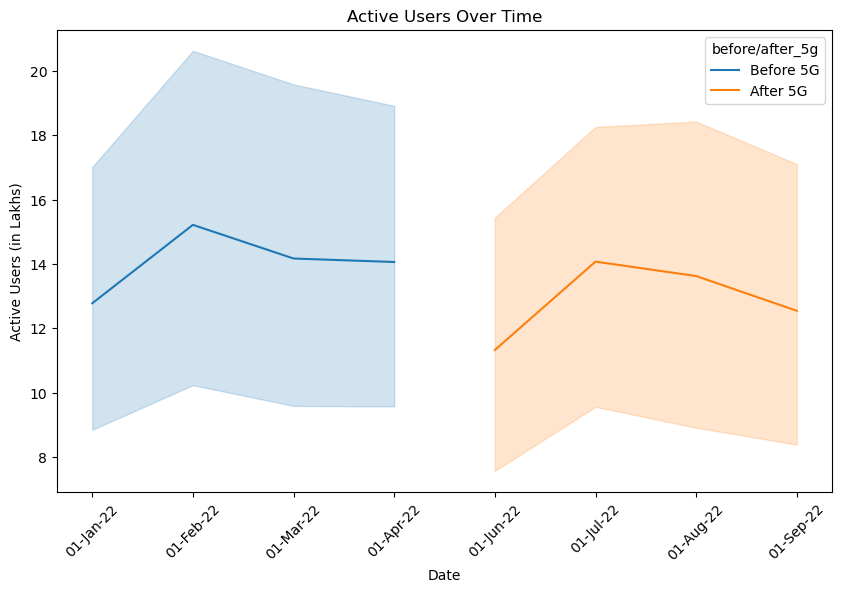

In [26]:
# Merge relevant dataframes
merged_data = pd.merge(dim_date, fact_atliqo_metrics, on=['date'])

# Plot active users over time
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='active_users_lakhs', hue='before/after_5g', data=merged_data)
plt.title('Active Users Over Time')
plt.xlabel('Date')
plt.ylabel('Active Users (in Lakhs)')
plt.xticks(rotation=45)
plt.show()

Visualizing Market Share

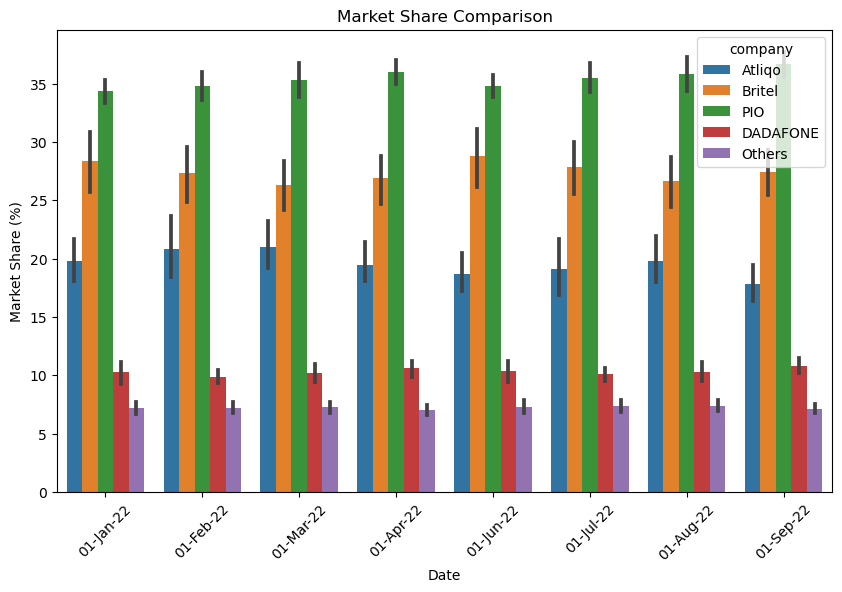

In [27]:
# Merge market share data
merged_market_share = pd.merge(dim_date, fact_market_share, on=['date'])

# Plot market share
plt.figure(figsize=(10, 6))
sns.barplot(x='date', y='ms_pct', hue='company', data=merged_market_share)
plt.title('Market Share Comparison')
plt.xlabel('Date')
plt.ylabel('Market Share (%)')
plt.xticks(rotation=45)
plt.show()


Correlation Analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_10440\3928804669.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_data_all.corr()


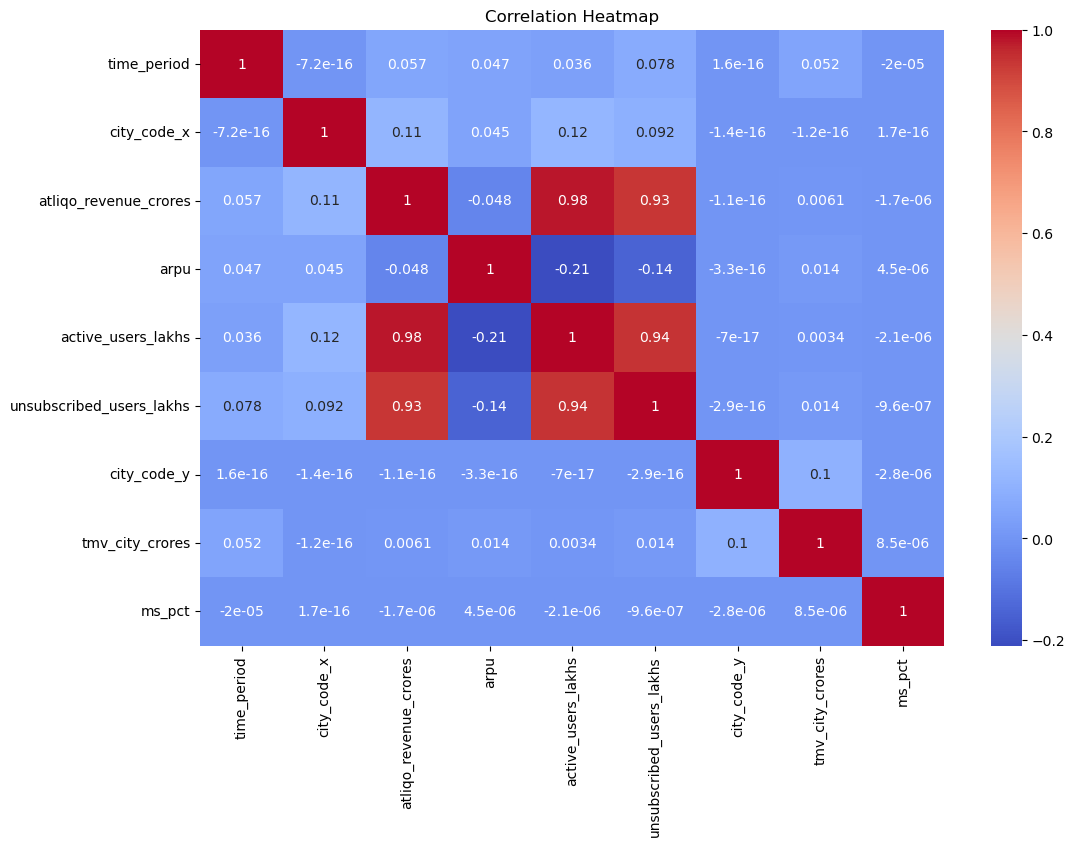

In [28]:
# Merge all relevant data
merged_data_all = pd.merge(dim_date, fact_atliqo_metrics, on=['date'])
merged_data_all = pd.merge(merged_data_all, fact_market_share, on=['date'])

# Calculate correlation matrix
correlation_matrix = merged_data_all.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Step 5: Advanced Visualization Techniques
Utilize advanced visualization methods to uncover complex patterns in the data.

Pair Plot for Multivariate Analysis

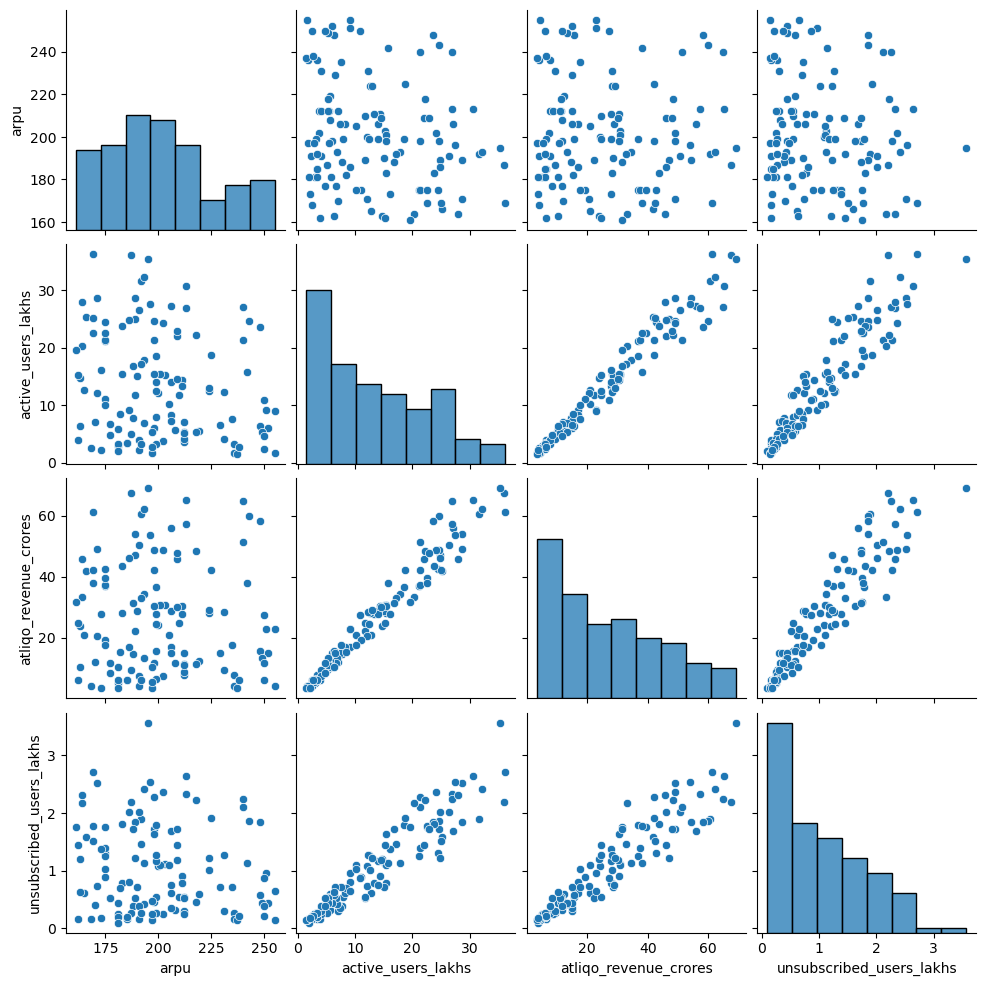

In [29]:
# Example: Pair plot to visualize relationships between numerical variables
sns.pairplot(fact_atliqo_metrics[['arpu', 'active_users_lakhs', 'atliqo_revenue_crores', 'unsubscribed_users_lakhs']])
plt.show()

Boxplots for Outlier Detection

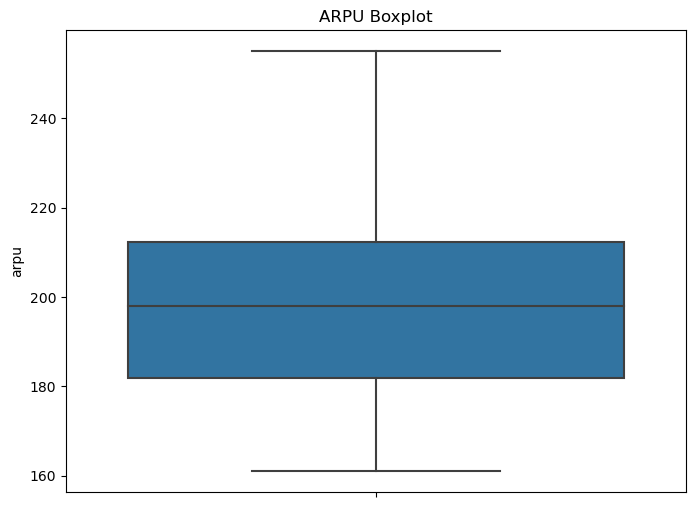

In [32]:
# Example: Boxplot for 'arpu' column to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y=fact_atliqo_metrics['arpu'])
plt.title('ARPU Boxplot')
plt.show()